# Лабораторная работа №1, Фундаментальные концепции ИИ
### Градиентный спуск и его модификации
#### Алапанова Эльза, М8О-109СВ-24

Импорт необходимых библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Пайплайн тестирования алгоритмов оптимизации

В качестве тестовых функций оптимизаций я выбрала сферическую функцию и функцию МакКормика

In [2]:
# функция сферы: используется как простая тестовая функция для оптимизации
def sphere(x):
    return x[0] ** 2 + x[1] ** 2

# функция МакКормика: более сложная тестовая функция с несколькими локальными минимумами
def mccormick(x):
    return np.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] + 1

Функция для численного вычисления градиента

In [3]:
def numerical_gradient(f, x, h=1e-5):
    """
    Численное вычисление градиента функции f в точке x.

    Параметры:
        f: функция, для которой вычисляется градиент.
        x: массив координат, где вычисляется градиент.
        h: шаг для конечных разностей (по умолчанию 1e-5).

    Возвращает:
        grad: массив градиента той же размерности, что и x.
    """
    grad = np.zeros_like(x, dtype=float) # Инициализация градиента
    fx = f(x)  # Значение функции в текущей точке
    for i in range(len(x)):
        x[i] += h
        grad[i] = (f(x) - fx) / h
        x[i] -= h
    return grad

Реализация градиентного спуска

In [7]:
def gradient_descent(f, grad_f, x0, alpha=0.01, epsilon=1e-6, max_iters=1000):
    """
    Алгоритм градиентного спуска для минимизации функции f.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента (или численный метод).
        x0: начальная точка (массив).
        alpha: шаг обучения (по умолчанию 0.01).
        epsilon: точность сходимости (по умолчанию 1e-6).
        max_iters: максимальное количество итераций (по умолчанию 1000).

    Возвращает:
        x: найденная точка минимума.
        trajectory: массив всех точек траектории оптимизации.
    """
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    
    for i in range(max_iters):
        # Вычисляем градиент: либо численно, либо через переданную функцию
        grad = grad_f(f, x) if callable(grad_f) else grad_f(x)
        x_new = x - alpha * grad # Шаг в направлении антиградиента
        trajectory.append(x_new.copy())
        # Проверяем условие сходимости
        if np.linalg.norm(x_new - x) < epsilon:
            print(f"Сходимость достигнута за {i + 1} итераций.")
            break
        x = x_new
        
    return x, np.array(trajectory)

Начальные точки

In [8]:
x0_sphere = [0.5, 0.4]
x0_mccormick = [0.0, 0.0]

In [9]:
result_sphere, traj_sphere = gradient_descent(sphere, numerical_gradient, x0_sphere, alpha=0.001)
result_mccormick, traj_mccormick = gradient_descent(mccormick, numerical_gradient, x0_mccormick, alpha=0.01)

Сходимость достигнута за 572 итераций.


In [10]:
print("Минимум для функции сферы:", result_sphere)
print("Минимум для функции МакКормика::", result_mccormick)

Минимум для функции сферы: [0.06752794 0.05402148]
Минимум для функции МакКормика:: [-0.54716557 -1.54716557]


## Визуализация

In [11]:
sphere_min = np.array(result_sphere)

Пайплайн для запуска нескольких оптимизаций и оценки ошибок

In [12]:
# пайплайн
def optimization_pipeline(f, grad_f, x0, alpha, num_runs=10):
    """
    Пайплайн для запуска оптимизаций и оценки средней ошибки.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента.
        x0: начальная точка (массив).
        alpha: шаг обучения.
        target_min: целевая точка минимума (массив).
        num_runs: количество запусков оптимизации (по умолчанию 10).

    Возвращает:
        trajectories: список траекторий всех запусков.
        avg_error: средняя ошибка по всем запускам.
    """
    errors = []
    trajectories = []
    
    for _ in range(num_runs):
        result, trajectory = gradient_descent(f, grad_f, x0, alpha)
        error = np.linalg.norm(result - sphere_min) # Оценка ошибки относительно целевого минимума
        errors.append(error)
        trajectories.append(trajectory)
    
    avg_error = np.mean(errors) # Средняя ошибка
    print(f"Средняя ошибка: {avg_error:.6f}")
    return trajectories, avg_error

Визуализация траектории оптимизации на 3D-графике

In [13]:
def plot_3d_function_with_trajectory(f, trajectory, title, x_bounds=(-5, 5), y_bounds=(-5, 5)):
    """
    Построение 3D-графика функции с отображением траектории градиентного спуска.

    Параметры:
        f: минимизируемая функция.
        trajectory: траектория оптимизации (массив точек).
        title: заголовок графика.
        x_bounds: границы по оси x (по умолчанию от -5 до 5).
        y_bounds: границы по оси y (по умолчанию от -5 до 5).
    """
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Создаем сетку значений для построения поверхности    
    x = np.linspace(x_bounds[0], x_bounds[1], 100)
    y = np.linspace(y_bounds[0], y_bounds[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f([xi, yi]) for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

    # Построение поверхности функции
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', alpha=0.6, edgecolor='none')
    
    # Отображение траектории градиентного спуска
    ax.plot(trajectory[:, 0], trajectory[:, 1], [f(point) for point in trajectory], 'k-', label="Gradient descent", alpha=0.7)

    # Начальная точка и найденный минимум
    ax.plot([trajectory[0, 0]], [trajectory[0, 1]], [f(trajectory[0])], 'kD', markersize=10, label="Start point")
    ax.plot([trajectory[-1, 0]], [trajectory[-1, 1]], [f(trajectory[-1])], 'kx', markersize=10, label="Found min")

    # Глобальный минимум (если известен)
    if f == sphere:
        ax.plot([0.], [0.], [sphere([0., 0.])], 'ro', markersize=10, label="Global min")
    elif f == mccormick:
        ax.plot([-0.54719], [-1.54719], [mccormick([-0.54719, -1.54719])], 'ro', markersize=10, label="Global min")

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.legend()
    ax.set_title(title)
    plt.show()

Тестирование функций и визуализация

Сходимость достигнута за 537 итераций.
Минимум для функции сферы: [2.47350914e-05 3.46467555e-05]


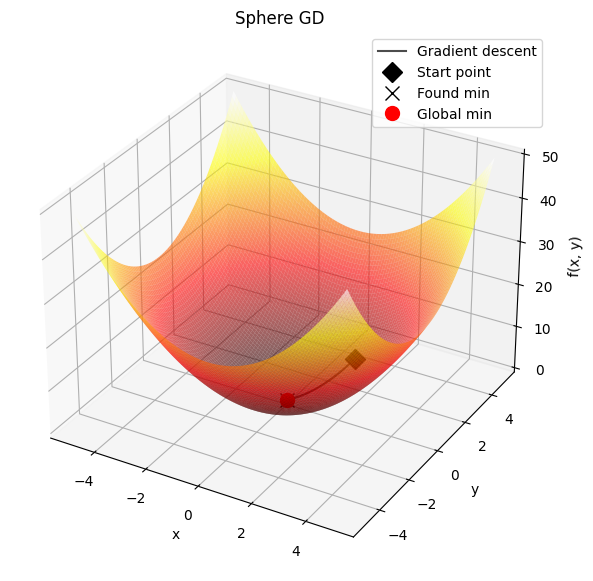

Сходимость достигнута за 572 итераций.
Минимум для функции МакКормика: [-0.54716557 -1.54716557]


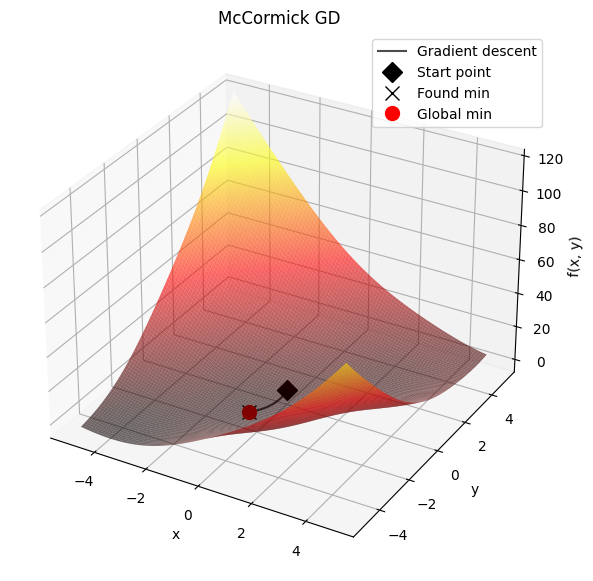

In [14]:
def test_functions():
    """
    Тестирование функций с использованием градиентного спуска и визуализация результатов.
    """
    # Тестирование функции сферы
    x0_sphere = [1.5, 2.0]  # Начальная точка для сферы
    result_sph, trajectory_sph = gradient_descent(sphere, numerical_gradient, x0_sphere, alpha=0.01)
    print("Минимум для функции сферы:", result_sph)
    plot_3d_function_with_trajectory(sphere, trajectory_sph, "Sphere GD")

    # Тестирование функции МакКормика
    x02 = [0., 0.] # Начальная точка для МакКормика
    result_mc, trajectory_mc = gradient_descent(mccormick, numerical_gradient, x0_mccormick, alpha=0.01)
    print("Минимум для функции МакКормика:", result_mc)
    plot_3d_function_with_trajectory(mccormick, trajectory_mc, "McCormick GD")

test_functions()

In [15]:
x0 = [1.5, 2.0]  # начальная точка
alpha = 0.01     # шаг обучения
trajectories, avg_error = optimization_pipeline(sphere, numerical_gradient, x0, alpha)

Сходимость достигнута за 537 итераций.
Сходимость достигнута за 537 итераций.
Сходимость достигнута за 537 итераций.
Сходимость достигнута за 537 итераций.
Сходимость достигнута за 537 итераций.
Сходимость достигнута за 537 итераций.
Сходимость достигнута за 537 итераций.
Сходимость достигнута за 537 итераций.
Сходимость достигнута за 537 итераций.
Сходимость достигнута за 537 итераций.
Средняя ошибка: 0.086436


Низкая средняя ошибка свидетельствует о том, что:
- Алгоритм корректно сходится к точке минимума.
- Параметры оптимизации, такие как шаг обучения (alpha) и точность (epsilon), подобраны адекватно для данной задачи.
- Численный градиент (в функции numerical_gradient) также вычисляется с достаточной точностью.

В данном случае результат оптимизации близок к идеальному.

Добавим модификации:

1. Моментную модификацию момента для ускорения сходимости.
2. Адаптивную модификацию — например, алгоритм AdaGrad.
3. Изменим темп обучения в процессе обучения, используя экспоненциальное уменьшение.
4. Реализуем метод случайного выбора начальной точки в пределах заданного диапазона.

Реализация градиентного спуска с моментумом

In [22]:
def gradient_descent_momentum(f, grad_f, x0, alpha=0.01, beta=0.9, epsilon=1e-6, max_iters=1000):
    """
    Градиентный спуск с моментумом для ускорения сходимости.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента.
        x0: начальная точка.
        alpha: шаг обучения.
        beta: коэффициент момента.
        epsilon: точность сходимости.
        max_iters: максимальное количество итераций.

    Возвращает:
        x: найденная точка минимума.
        trajectory: траектория точек оптимизации.
        
    """
    x = np.array(x0, dtype=float)
    velocity = np.zeros_like(x)
    trajectory = [x.copy()]

    for i in range(max_iters):
        grad = grad_f(f, x)
        velocity = beta * velocity + (1 - beta) * grad
        x_new = x - alpha * velocity
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            print(f"Сходимость достигнута за {i + 1} итераций.")
            break
        x = x_new

    return x, np.array(trajectory)

Реализация алгоритма AdaGrad

In [23]:
def adagrad(f, grad_f, x0, alpha=0.1, epsilon=1e-6, max_iters=1000):
    """
    Адаптивный метод AdaGrad для оптимизации.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента.
        x0: начальная точка.
        alpha: начальный шаг обучения.
        epsilon: точность сходимости.
        max_iters: максимальное количество итераций.

    Возвращает:
        x: найденная точка минимума.
        trajectory: траектория точек оптимизации.
    """
    x = np.array(x0, dtype=float)
    grad_squared_sum = np.zeros_like(x)
    trajectory = [x.copy()]

    for i in range(max_iters):
        grad = grad_f(f, x)
        grad_squared_sum += grad**2
        adjusted_grad = grad / (np.sqrt(grad_squared_sum) + 1e-8)
        x_new = x - alpha * adjusted_grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            print(f"Сходимость достигнута за {i + 1} итераций.")
            break
        x = x_new

    return x, np.array(trajectory)

Реализация градиентного спуска с убывающим шагом обучения

In [24]:
def gradient_descent_decay(f, grad_f, x0, alpha=0.1, decay_rate=0.99, epsilon=1e-6, max_iters=1000):
    """
    Градиентный спуск с экспоненциальным уменьшением шага обучения.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента.
        x0: начальная точка.
        alpha: начальный шаг обучения.
        decay_rate: коэффициент уменьшения шага.
        epsilon: точность сходимости.
        max_iters: максимальное количество итераций.

    Возвращает:
        x: найденная точка минимума.
        trajectory: траектория точек оптимизации.
    """
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]

    for i in range(max_iters):
        grad = grad_f(f, x)
        x_new = x - alpha * grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            print(f"Сходимость достигнута за {i + 1} итераций.")
            break
        x = x_new
        alpha *= decay_rate  # уменьшаем темп обучения

    print(f"Достигнуто максимальное количество итераций: {max_iters}.")
    return x, np.array(trajectory)

Метод случайного выбора начальной точки

In [25]:
def random_start(f, grad_f, bounds, alpha=0.01, method='momentum'):
    """
    Выбор случайной начальной точки и запуск выбранного метода оптимизации.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента.
        bounds: границы для случайной точки (tuple of lists: [min, max]).
        alpha: шаг обучения.
        method: метод оптимизации ('momentum', 'adagrad', 'decay').

    Возвращает:
        Результат выполнения выбранного метода.
    """
    x0 = np.random.uniform(bounds[0], bounds[1], size=2)
    if method == 'momentum':
        return gradient_descent_momentum(f, grad_f, x0, alpha=alpha)
    elif method == 'adagrad':
        return adagrad(f, grad_f, x0, alpha=alpha)
    elif method == 'decay':
        return gradient_descent_decay(f, grad_f, x0, alpha=alpha)

In [26]:
def test_modifications():
    bounds = [-5, 5]

    result_sph_mom, trajectory_sph_mom = random_start(sphere, numerical_gradient, bounds, method='momentum')
    plot_3d_function_with_trajectory(sphere, trajectory_sph_mom, "Sphere with Momentum")

    result_mc_adagrad, trajectory_mc_adagrad = random_start(mccormick, numerical_gradient, bounds, method='adagrad')
    plot_3d_function_with_trajectory(mccormick, trajectory_mc_adagrad, "McCormick with AdaGrad")

    result_sph_decay, trajectory_sph_decay = random_start(sphere, numerical_gradient, bounds, method='decay')
    plot_3d_function_with_trajectory(sphere, trajectory_sph_decay, "Sphere with Learning Rate Decay")

Сходимость достигнута за 449 итераций.


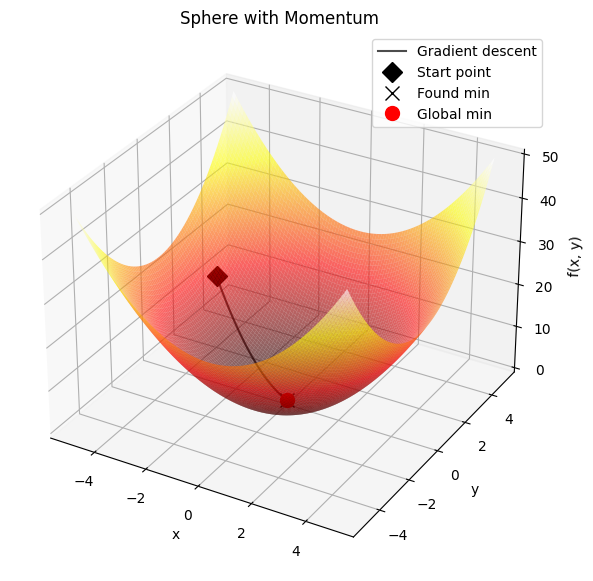

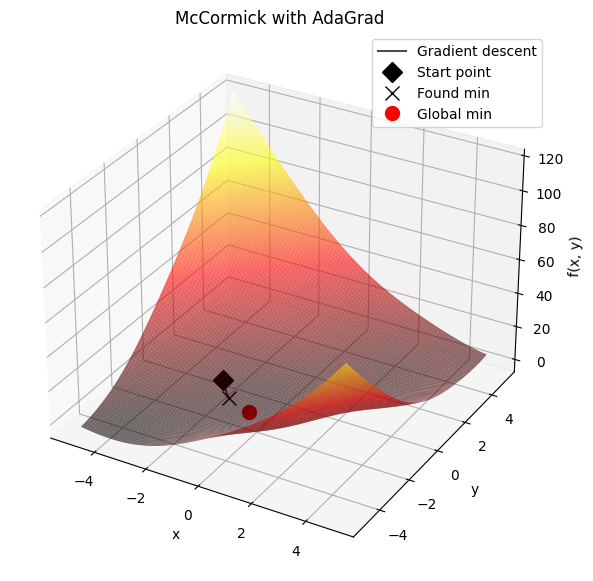

Сходимость достигнута за 859 итераций.
Достигнуто максимальное количество итераций: 1000.


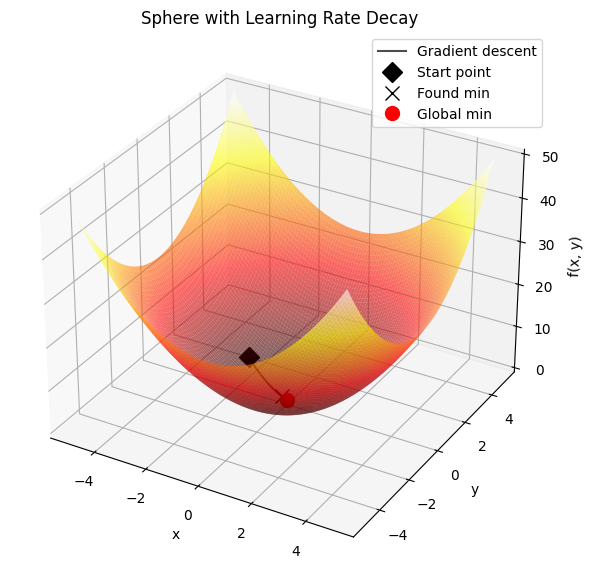

In [27]:
test_modifications()

Как видим, наиболее удачным кажется метод модификации темпа обучения. Проверим это на второй функции.

Сходимость достигнута за 882 итераций.
Достигнуто максимальное количество итераций: 1000.


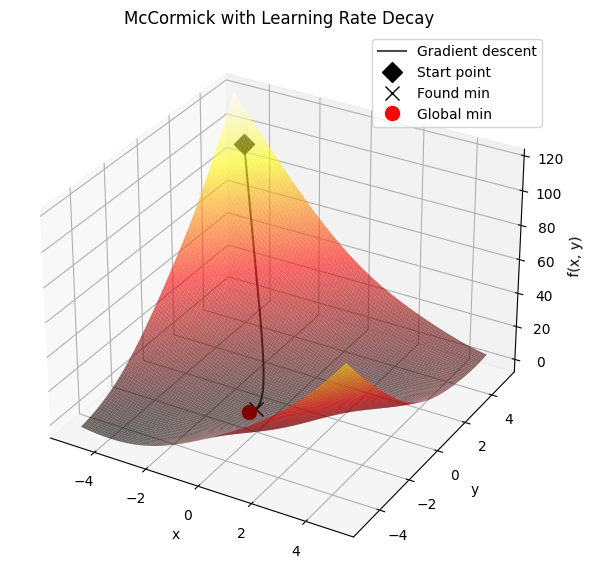

In [33]:
result_m_decay, trajectory_m_decay = random_start(mccormick, numerical_gradient, [-5, 5], method='decay')
plot_3d_function_with_trajectory(mccormick, trajectory_m_decay, "McCormick with Learning Rate Decay")

### Вывод
В рамках данной лабораторной работы был изучен и реализован метод градиентного спуска и его модификации для решения задач оптимизации, включая выбор тестовых функций, реализацию классического градиентного спуска, а также разработку нескольких модификаций для улучшения процесса оптимизации.